In [1]:
# Loading libraries
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Importing dataset
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Alter axes labels
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)
# Dropping unnecessary data
df.drop('CustomerID',axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


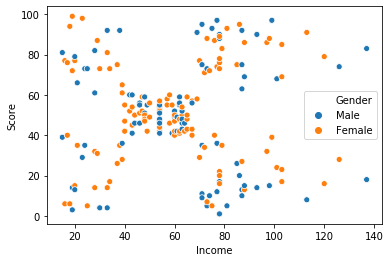

In [8]:
# plt.xlabel('Income')
# plt.ylabel('Spending Score')
# plt.scatter(df.Income,df.Score)

sns.scatterplot(x='Income',y='Score',hue='Gender',data=df)

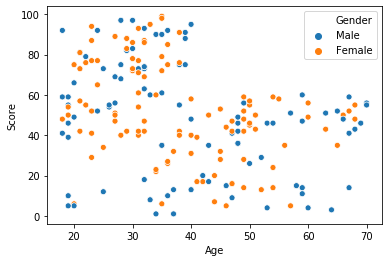

In [9]:
# plt.xlabel('Age')
# plt.ylabel('Spending Score')
# plt.scatter(df.Age,df.Score)

sns.scatterplot(x='Age',y='Score',hue='Gender',data=df)

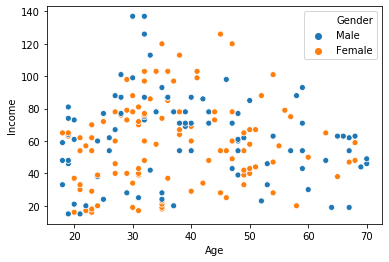

In [10]:
# plt.xlabel('Age')
# plt.ylabel('Income')
# plt.scatter(df.Age,df.Income)

sns.scatterplot(x='Age',y='Income',hue='Gender',data=df)

In [11]:
# Encoding a feature/column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [12]:
df.head()

,Gender,Age,Income,Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
# Dataframe columns
df.columns

Index(['Gender', 'Age', 'Income', 'Score'], dtype='object')

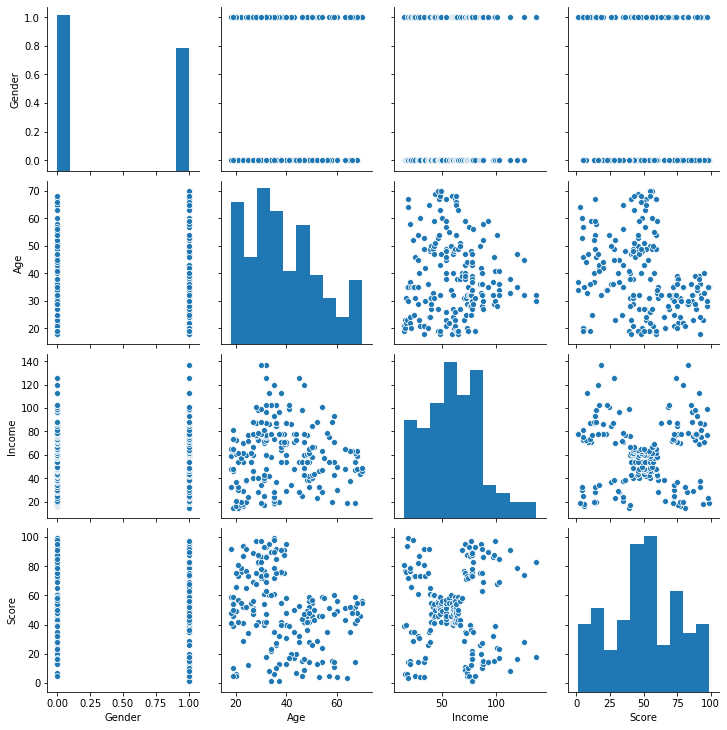

In [14]:
# Pairwise relationships in Dataset
sns.pairplot(df)

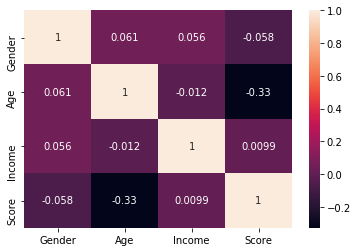

In [15]:
# Data Visualization for Correlation Matrix
sns.heatmap(df.corr(), annot=True)

# K-Means Cluster

In [16]:
# from sklearn.cluster import KMeans
import sklearn.cluster as cluster
kmeans = cluster.KMeans()

In [17]:
df['Cluster'] = kmeans.fit_predict(df)

In [18]:
df.head()

,Gender,Age,Income,Score,Cluster
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3


In [19]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]
df6 = df[df.Cluster == 5]
df7 = df[df.Cluster == 6]
df8 = df[df.Cluster == 7]

In [20]:
df8.head()

,Gender,Age,Income,Score,Cluster
123,1,39,69,91,7
125,0,31,70,77,7
127,1,40,71,95,7
129,1,38,71,75,7
131,1,39,71,75,7


In [21]:
df8.shape

(29, 5)

In [42]:
# Centroids
centroid = kmeans.cluster_centers_
centroid

array([[  0.35135135,  27.10810811,  56.2972973 ,  49.67567568],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.4       ,  32.2       , 109.7       ,  82.        ],
       [  0.38095238,  44.14285714,  25.14285714,  19.52380952],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.65384615,  41.23076923,  79.26923077,  15.92307692],
       [  0.44444444,  56.15555556,  53.37777778,  49.08888889],
       [  0.48275862,  32.86206897,  78.55172414,  82.17241379]])

In [23]:
kmeans.predict([[1,30,0,50]])

array([4])

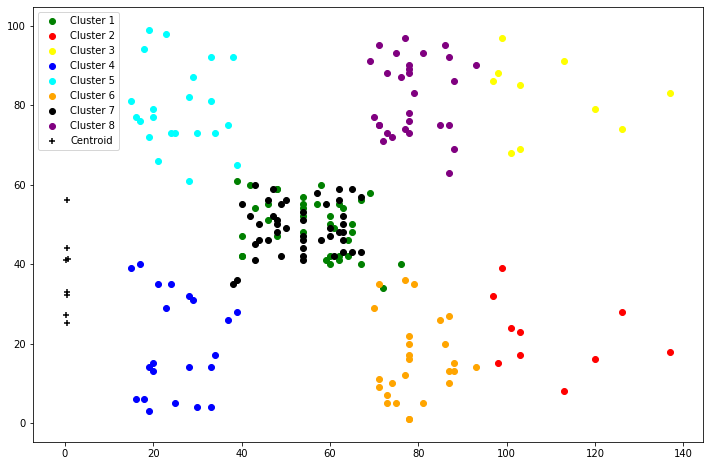

In [24]:
plt.figure(figsize=[12,8])

plt.scatter(df1['Income'],df1['Score'],color='green',label="Cluster 1")
plt.scatter(df2['Income'],df2['Score'],color='red' ,label="Cluster 2")
plt.scatter(df3['Income'],df3['Score'],color='yellow',label="Cluster 3")
plt.scatter(df4['Income'],df4['Score'],color='blue',label="Cluster 4")
plt.scatter(df5['Income'],df5['Score'],color='cyan' ,label="Cluster 5")
plt.scatter(df6['Income'],df6['Score'],color='orange' ,label="Cluster 6")
plt.scatter(df7['Income'],df7['Score'],color='black' ,label="Cluster 7")
plt.scatter(df8['Income'],df8['Score'],color='purple' ,label="Cluster 8")

# Centroids
plt.scatter(centroid[:,0],centroid[:,1],color='black',marker='+',label='Centroid')

plt.legend()

# Tuning / Optimization

### Elbow Method

In [25]:
from sklearn.cluster import KMeans
clusters = range(1,15)
wcss = []                             # WCSS = Within-Cluster Sum of Square
for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(df[['Gender', 'Age', 'Income', 'Score']])
    wcss.append(km.inertia_)          #inertia = Sum of Squared Distance/Error (SSE) to centroid

In [26]:
wcss

[308862.06000000006,
 212889.44245524297,
 143391.59236035682,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51165.18423710792,
 44685.222402692336,
 40948.7929507992,
 37282.61271621876,
 34689.99466089466,
 32239.91209530064,
 29522.78729296066,
 28511.444051781553]

Text(0, 0.5, 'WCSS')

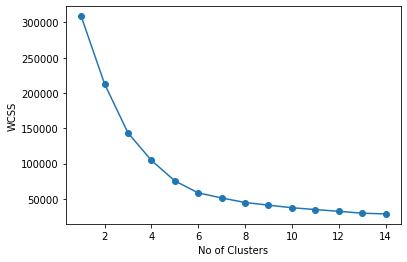

In [27]:
# plot(x, y, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(clusters,wcss,marker='o')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")

## Kneed Library

In [28]:
!pip install kneed

In [29]:
from kneed import KneeLocator
kn = KneeLocator(clusters,wcss,curve='convex',direction='decreasing')

In [30]:
#Optimal number of Cluster
kn.knee

5

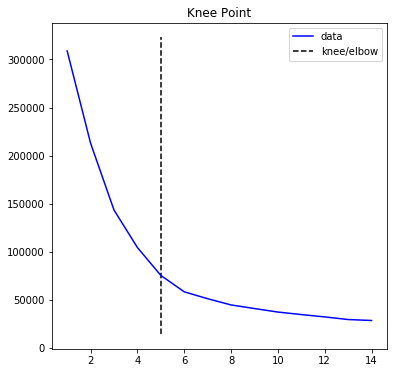

In [31]:
# Knee curve
kn.plot_knee()

## After Tuning (K=5)

In [58]:
from sklearn.cluster import KMeans
k_mean = KMeans(n_clusters=5)
pred = k_mean.fit_predict(df[[ 'Income', 'Score']])

In [59]:
# Predicted Clusters
pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [54]:
df['Cluster'] = pred
df.head()

,Gender,Age,Income,Score,Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [55]:
# Final centroids
center = k_mean.cluster_centers_
center

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

In [56]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]

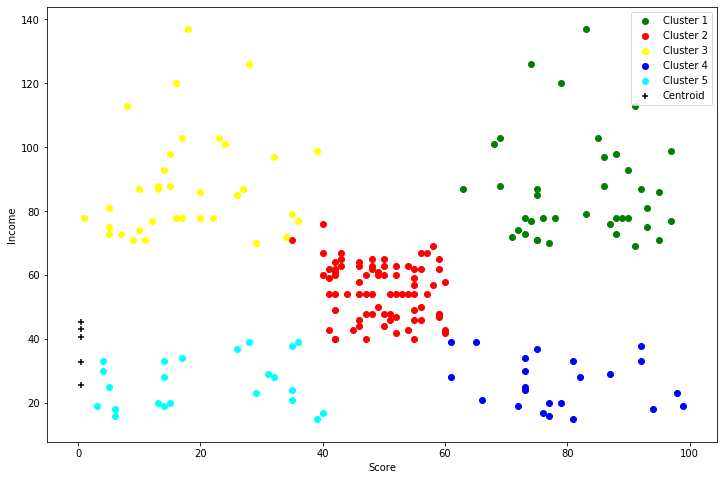

In [57]:
plt.figure(figsize=[12,8])

plt.scatter(df1['Score'],df1['Income'],color='green',label="Cluster 1")
plt.scatter(df2['Score'],df2['Income'],color='red' ,label="Cluster 2")
plt.scatter(df3['Score'],df3['Income'],color='yellow',label="Cluster 3")
plt.scatter(df4['Score'],df4['Income'],color='blue',label="Cluster 4")
plt.scatter(df5['Score'],df5['Income'],color='cyan' ,label="Cluster 5")

# Centroid
plt.scatter(center[:,0],center[:,1],color='black',marker='+',label='Centroid')

plt.xlabel('Score')
plt.ylabel('Income')
plt.legend()